# Introduction to Exploratory Data Analysis (EDA)

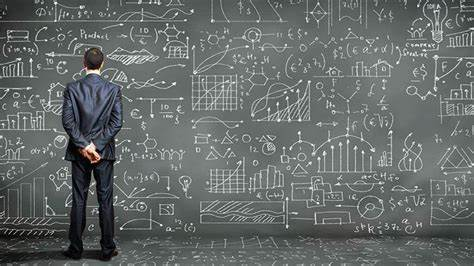

In this tutorial, you will learn how to gain understanding of a dataset through exploratory data analysis before deciding on the features to use for your Machine Learning model and the type of model to build.

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves understanding, exploring, and visualizing data to derive important insights.

The dataset we will be using here is the Adult Income Dataset which can be downloaded from kaggle using this link: <b>[Adult Income Dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)</b>.

## About the Dataset
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

## Import Python Libraries
We will be using Pandas, Matplotlib and Seaborn to explore this dataset.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load income dataset

In [2]:
# Load income dataset into pandas DataFrame
df = pd.read_csv("data/adult.csv")

# check how data looks by viewing the top five records in the data
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Exploratory Data Analysis (EDA)

In [3]:
# print a cocise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<b>From the summary above it can be seen that:</b>
 - The DataFrame has 48842 rows and 15 columns
 - There is no null value or missing information in the dataset as all columns have 48842 entries
 - Data types include integers(int) and strings(object)
 - The DataFrame shows there are no null values but a closer look at the loaded dataset shows columns with (?) values

In [4]:
# Let's check which columns have question mark (?) as values in the DataFrame

# First convert the ? entries to nan
df2 = df.replace('?', float('nan'), inplace=False)

# Check missing values
df2.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

The above shows that the workclass column has 2799 ? values while occupation column and capital-loss column both have 2809 and 857 ? values respectively.

While our DataFrame shows that we have no null values, it is worthy of note that these particular columns have unknown values represented or filled with question mark(?)

## Print statistical characteristics of numerical variables in the dataset

In [5]:
# Summary statistics rounded to two decimal places
df.describe().round(2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.00,48842.00,48842.00,48842.00,48842.0,48842.00
mean,38.64,189664.13,10.08,1079.07,87.5,40.42
std,13.71,105604.03,2.57,7452.02,403.0,12.39
min,17.00,12285.00,1.00,0.00,0.0,1.00
25%,28.00,117550.50,9.00,0.00,0.0,40.00
50%,37.00,178144.50,10.00,0.00,0.0,40.00
75%,48.00,237642.00,12.00,0.00,0.0,45.00
max,90.00,1490400.00,16.00,99999.00,4356.0,99.00




*   **count:** total count of non-null values in the column
*   **mean**: the average of all the values in that co
*   **std:** this is the standard deviation olumn
*   **max:** the maximum value in the column
*   **25%:** first quartile in the column after we arrange those values in ascending order
*   **50%:** this is the median or the second quartile
*   **75%:** the third ntile values

In [6]:
# Check number of unique values or categories in each column
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

Above are the number of distinct entries in each column. There are 74 unique values for age, 9 for workclass and so on. 

## Let's plot some graphs to visualize the dataset and relationship between columns

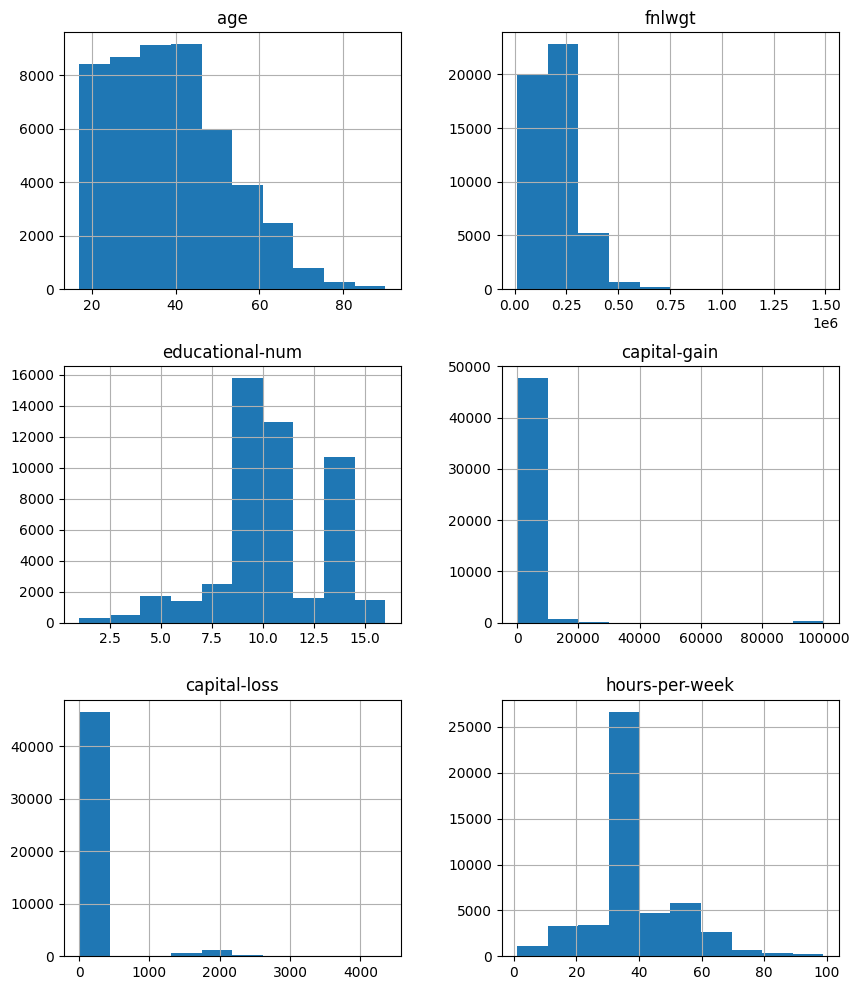

In [7]:
# plot histogram of numerical columns using pandas
df.hist(bins=10, figsize=(10,12));

Above are Histogram plots of numerical columns in the dataset showing the distributions. we can infer from these plots that:
 - Most of the people in the dataset are within the age range of 17 and 45 years of age.
 - The final weight (fnlwgt) assigned to each record is majorly between 1,000,000 and 3,000,000
 - Most individuals completed between 8 to 12 years of education (educational_num).
 - The profit earned from selling an asset (such as stocks, real estate, or other investments) at a price higher than its purchase cost (capital-gain) is mostly between 0-10000 USD
 - The losses from selling an asset (such as stocks, real estate, or other investments) for a price lower than the original purchase price (capital-loss) is mostly between 0-450 USD
 - Most people worked between 30 - 40 hours-per-week

In [8]:
# Correlation between numerical columns
num_columns = df[["age","fnlwgt","educational-num","capital-gain","capital-loss","hours-per-week"]]
num_columns.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


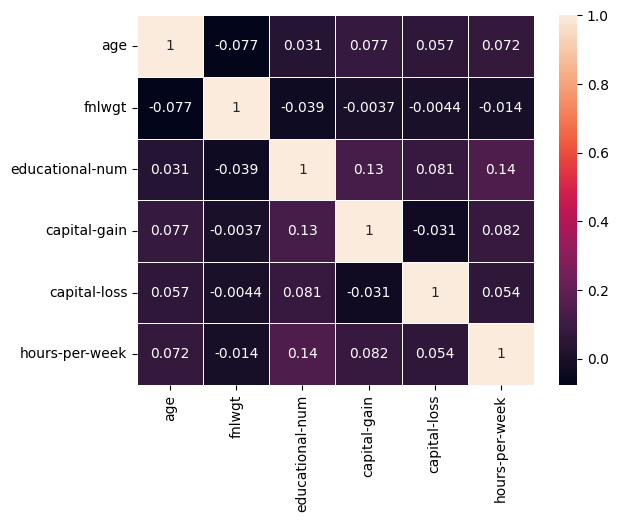

In [9]:
# Plot correlation matrix heatmap using Seaborn
sns.heatmap(num_columns.corr(), annot=True, linewidth=0.5);

The correlation between the numerical columns is low and as such we do not have high collinearity between numerical columns

Lets visualize the count plot of unique values in each column
-

Age
- 

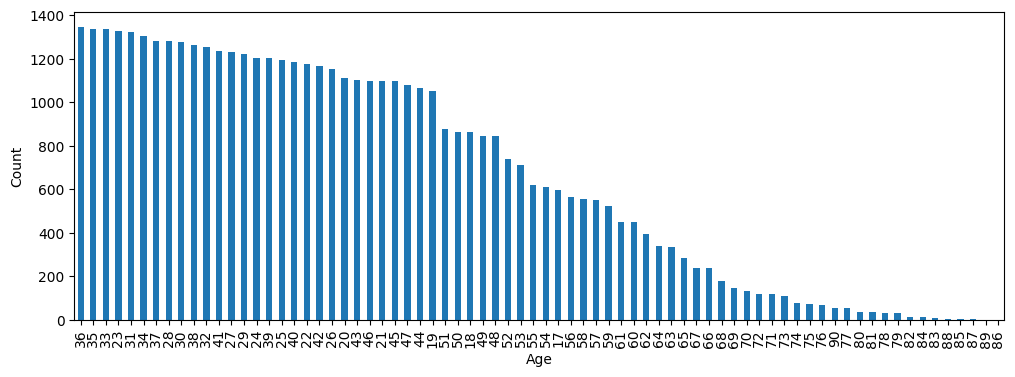

In [10]:
df["age"].value_counts().plot.bar(figsize = (12, 4));
plt.xlabel("Age")
plt.ylabel("Count")
plt.show();

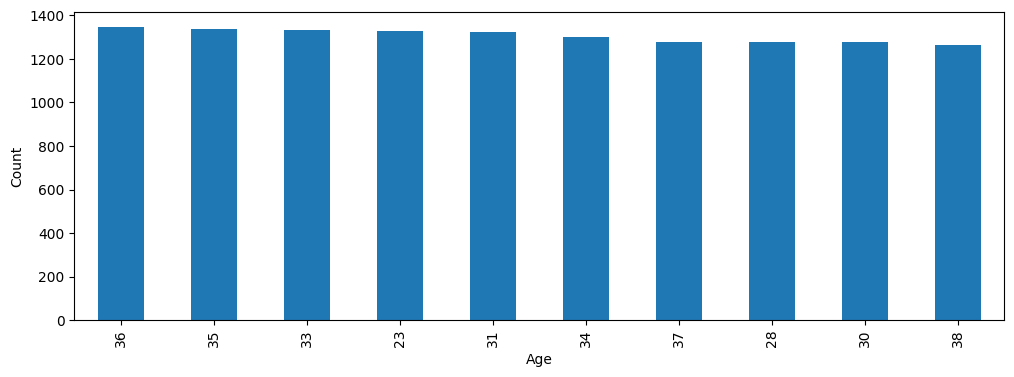

In [11]:
# Top 10 most frequent age groups in the dataset
df["age"].value_counts().head(10).plot.bar(figsize = (12, 4));
plt.xlabel("Age")
plt.ylabel("Count")
plt.show();

Workclass
- 

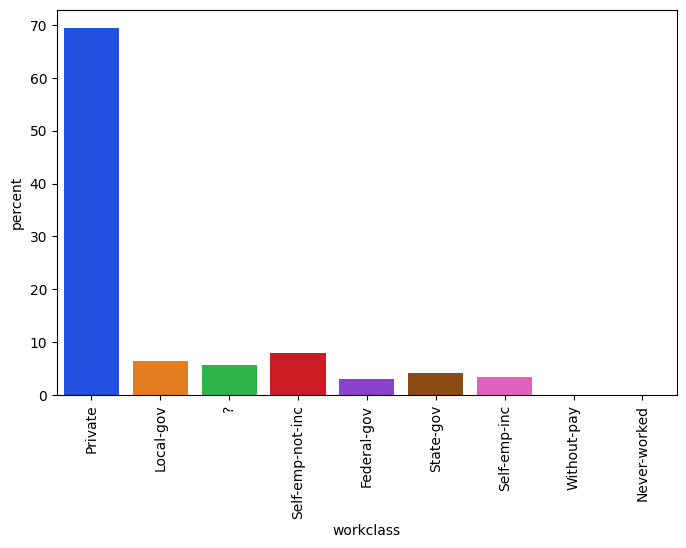

In [12]:
# Seaborn has six variations of matplotlib’s palette, called deep, muted, pastel, bright, dark, and colorblind
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="workclass", stat="percent", hue="workclass", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

From above we can see that 70% of workclass fall under the private 

Education
- 

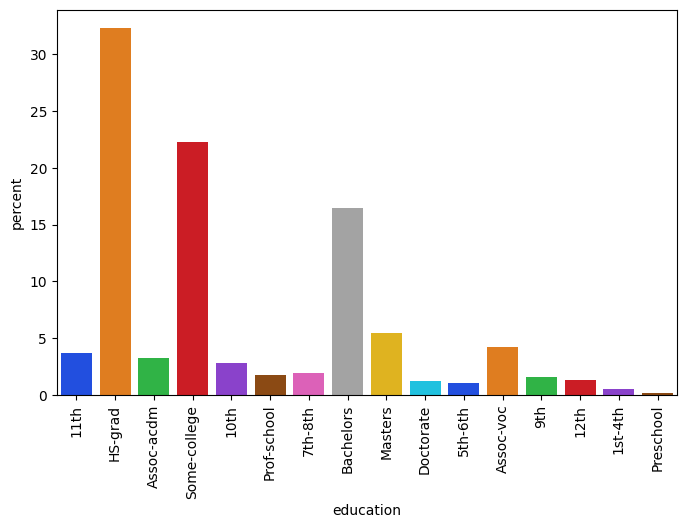

In [13]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="education", stat="percent", hue="education", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Majority of the workclass are High school grads, bachelors degree holders and college grads

### Education and Workclass

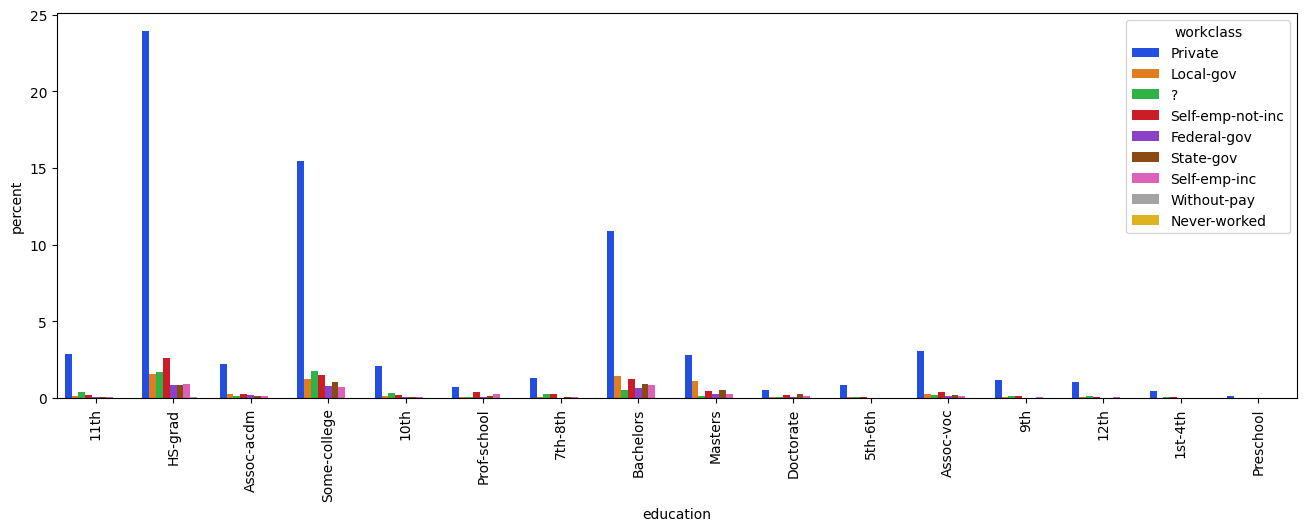

In [14]:
fig, ax = plt.subplots(figsize = (16, 5))
sns.countplot(data=df, x="education", stat="percent", hue="workclass", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

It is evident from above that majority of the workclass from different education groups work in the private sector.

### Marital-status and Workclass

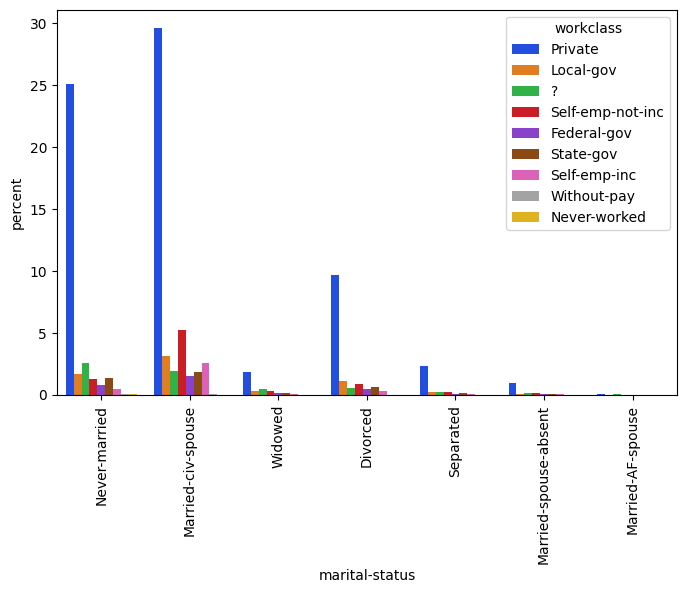

In [15]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="marital-status", stat="percent", hue="workclass", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Above is the distribution of workclass by marital-status. Majority of singles and married-civ-spouse work in the private sector

### Occupation

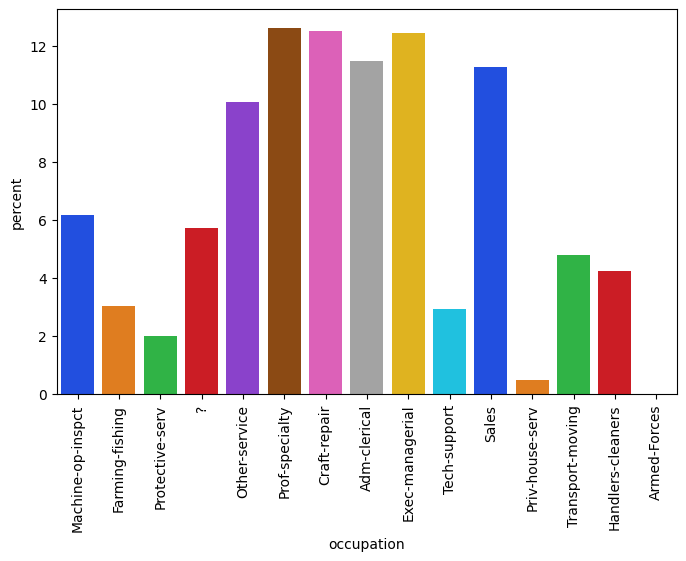

In [16]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="occupation", stat="percent", hue="occupation", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Majority of the adults work in the prof-specialty, craft-repair, adm-clerical, exec-managerial, sales and other-services occupation

### Race and Income

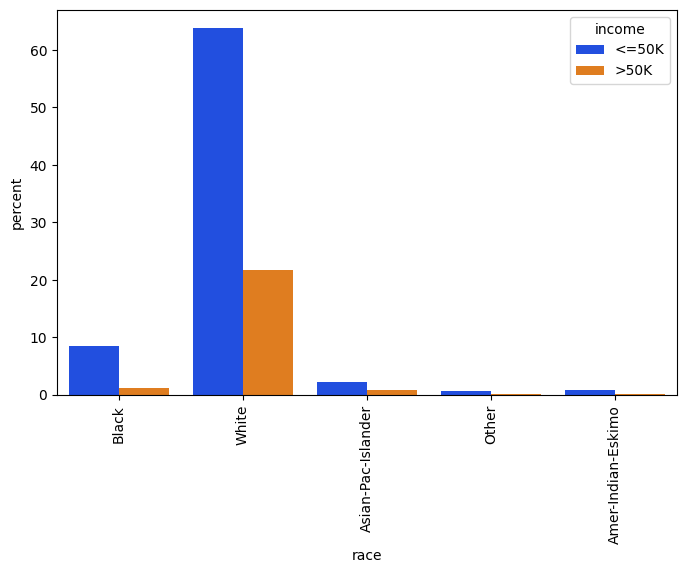

In [17]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="race", stat="percent", hue="income", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

The above shows that the whites earn significantly more than other races in the dataset.

Let's explore the relationship between 'race' and 'education' and also 'occupation' to find out why.

### Race and Occupation

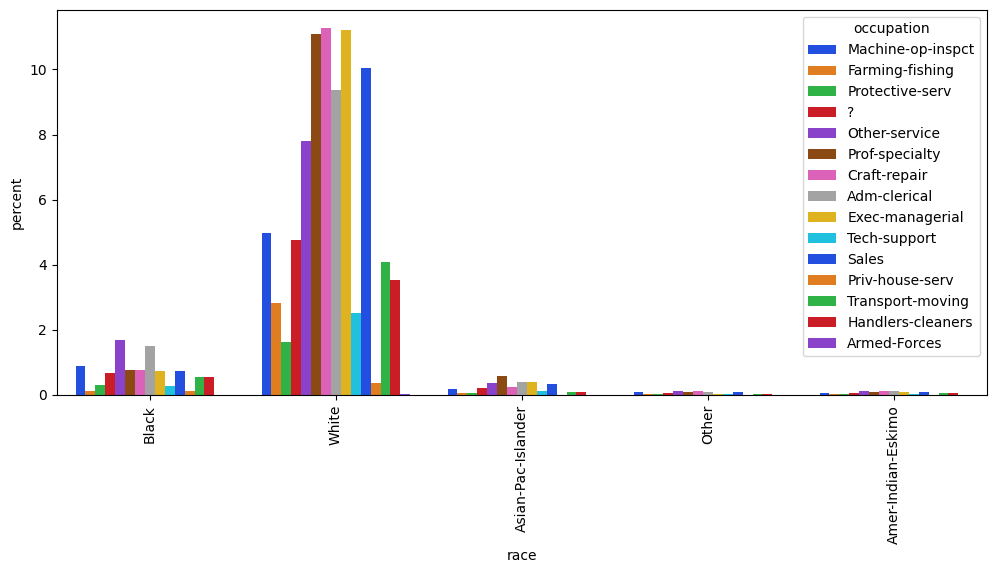

In [18]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.countplot(data=df, x="race", stat="percent", hue="occupation", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

### Race and Education

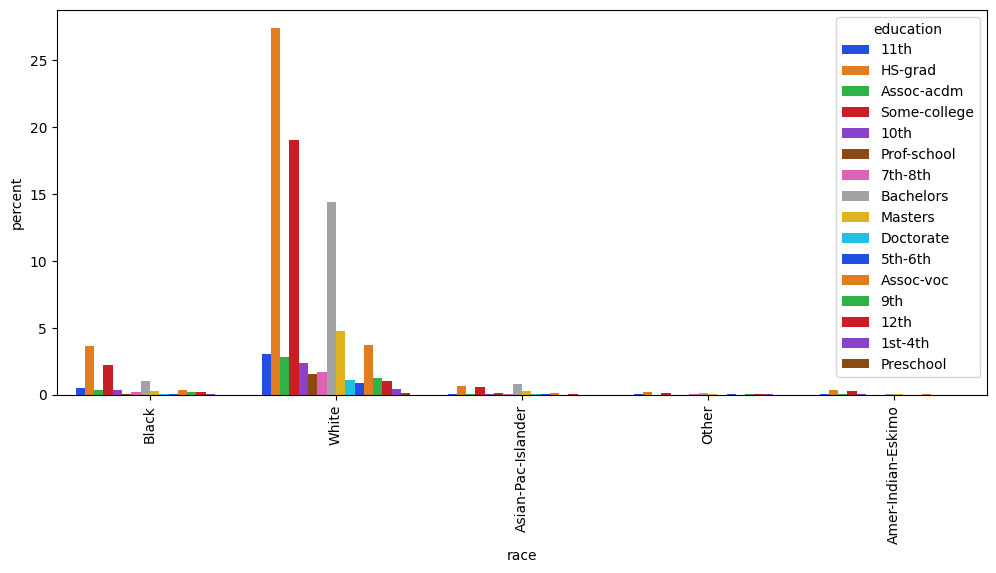

In [19]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.countplot(data=df, x="race", stat="percent", hue="education", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

From above plots, it is evident that the dataset includes a high proportion of educated and workclass whites.

### Gender and Income

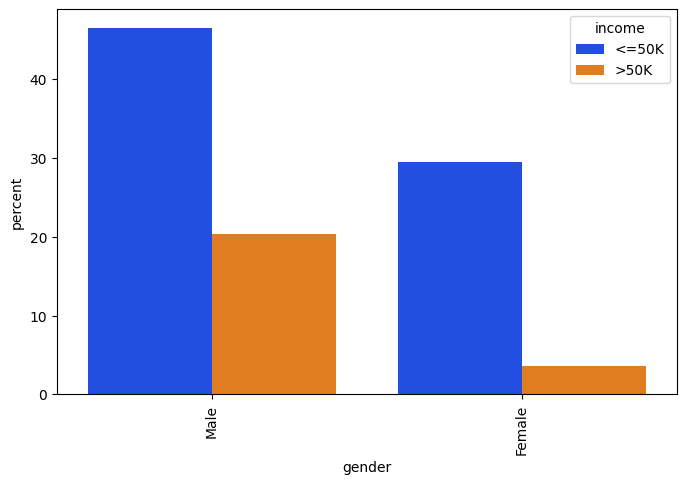

In [20]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="gender", stat="percent", hue="income", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

The figure above shows that Males in both income groups earn significantly more than the females respectively

### Gender

In [21]:
df["gender"].value_counts(normalize=True)

gender
Male      0.668482
Female    0.331518
Name: proportion, dtype: float64

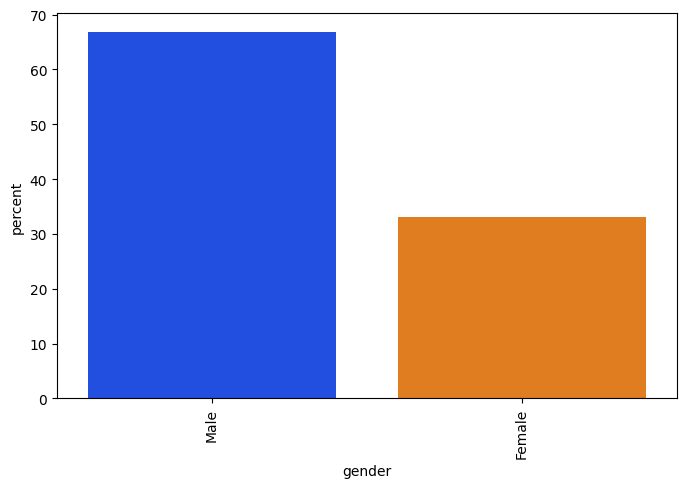

In [22]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="gender", stat="percent", hue="gender", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

we can see from above that 67% of employees are males while only 33% are females.

Let's take a look at the relationship in the numerical columns once more
- 

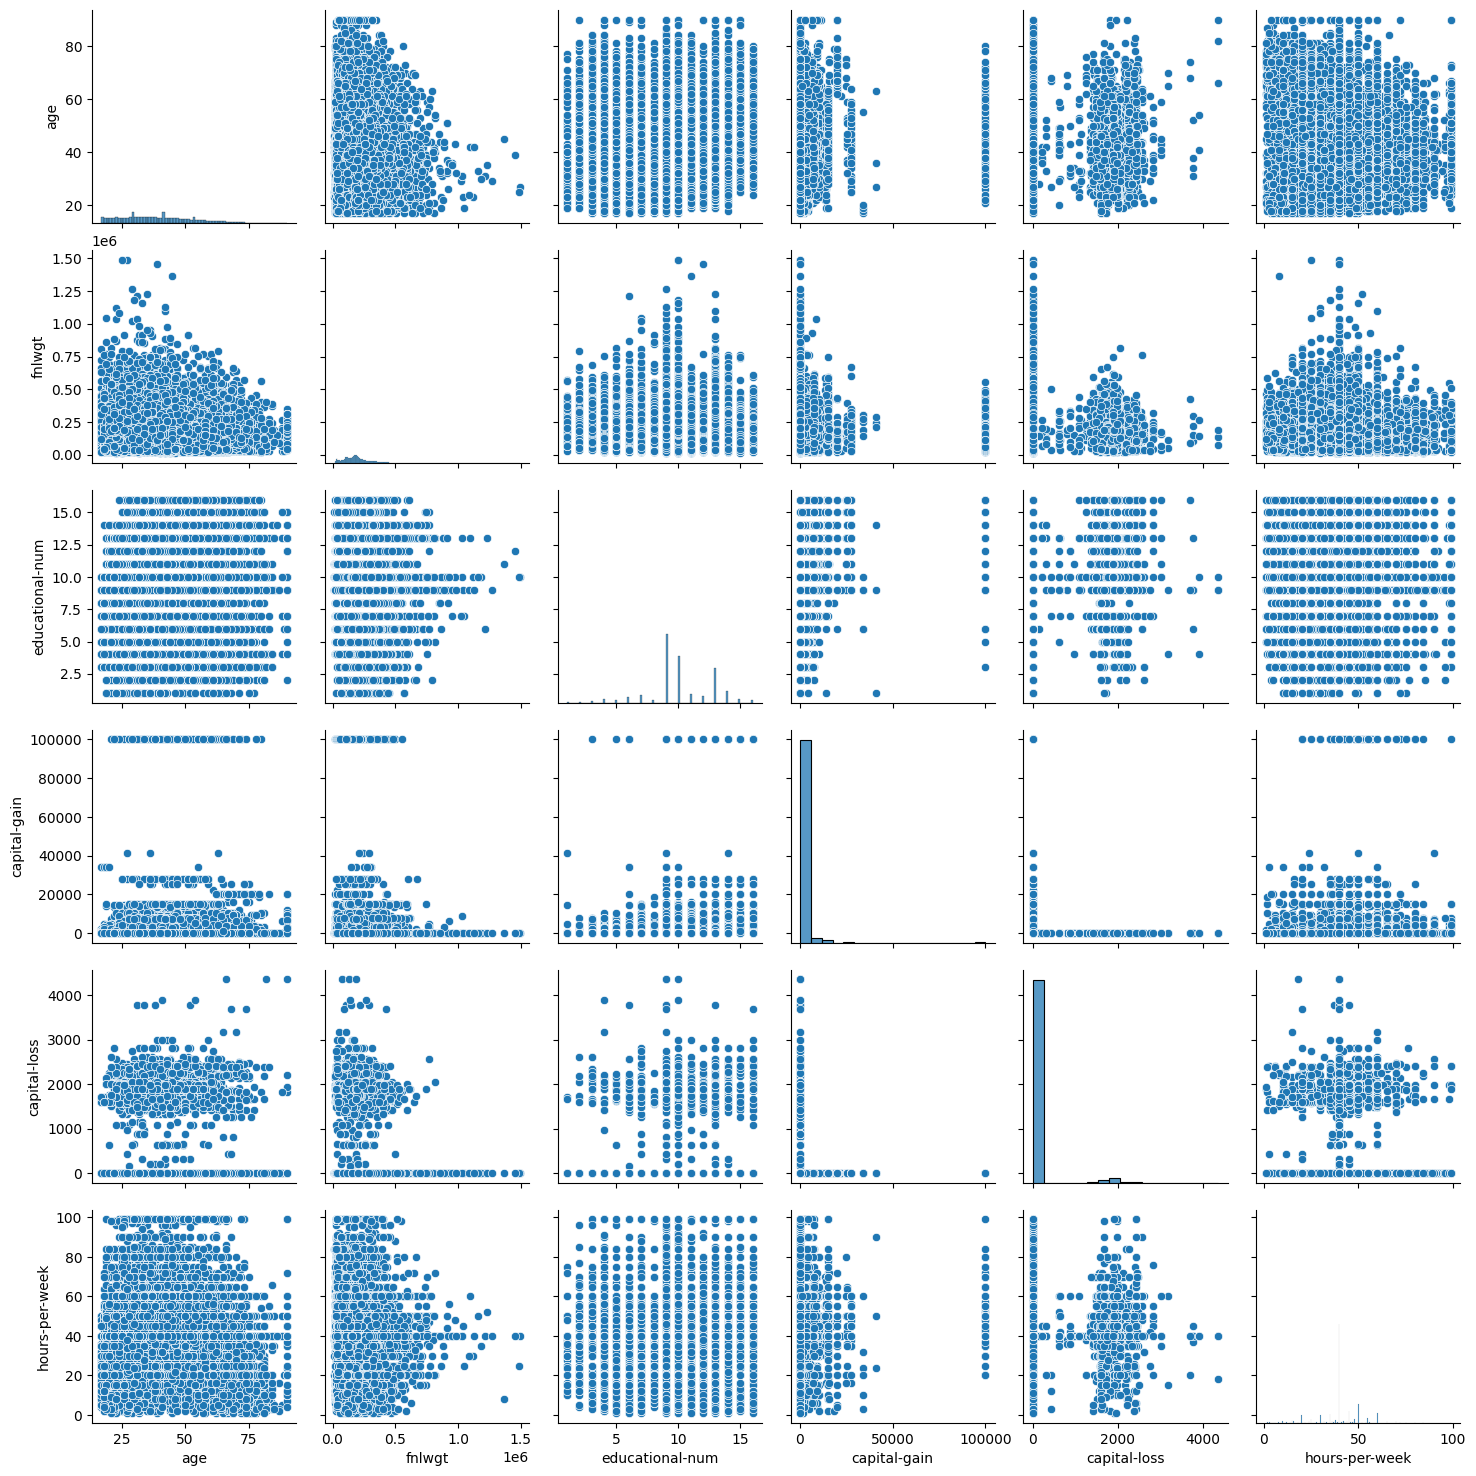

In [23]:
sns.pairplot(df)

As can be seen from above once again, 
- there is no sign of a linear correlation between the numerical columns.
- A look at the income column shows that it is classified into two groups (<=50k and >50k) so let's take a closer look at the income column

### Income

In [24]:
df["income"].value_counts(normalize=True)

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

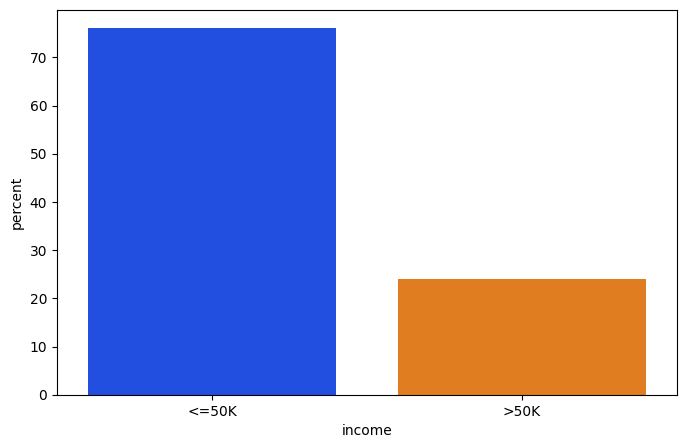

In [25]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="income", stat="percent", hue="income", palette="bright", ax=ax);

76% of the employees earn 50K USD or less while the remaining 24% earn above 50k USD.

Get summary statistics for numerical columns for each target income group
- 

In [26]:
df_classification_summary = df.groupby('income').describe().T.round(2)
df_classification_summary

income                      <=50K        >50K
age             count    37155.00    11687.00
                mean        36.87       44.28
                std         14.10       10.56
                min         17.00       19.00
                25%         25.00       36.00
                50%         34.00       43.00
                75%         46.00       51.00
                max         90.00       90.00
fnlwgt          count    37155.00    11687.00
                mean    190039.57   188470.57
                std     106577.60   102442.73
                min      12285.00    13769.00
                25%     117210.00   118942.50
                50%     178811.00   176729.00
                75%     238917.00   233505.00
                max    1490400.00  1226583.00
educational-num count    37155.00    11687.00
                mean         9.60       11.60
                std          2.44        2.38
                min          1.00        1.00
                25%          9.00       10.00
                50%          9.00       12.00
                75%         10.00       13.00
                max         16.00       16.00
capital-gain    count    37155.00    11687.00
                mean       147.01     4042.24
                std        936.75    14756.77
                min          0.00        0.00
                25%          0.00        0.00
                50%          0.00        0.00
                75%          0.00        0.00
                max      41310.00    99999.00
capital-loss    count    37155.00    11687.00
                mean        54.15      193.53
                std        313.32      593.21
                min          0.00        0.00
                25%          0.00        0.00
                50%          0.00        0.00
                75%          0.00        0.00
                max       4356.00     3683.00
hours-per-week  count    37155.00    11687.00
                mean        38.84       45.45
                std         12.36       11.09
                min          1.00        1.00
                25%         35.00       40.00
                50%         40.00       40.00
                75%         40.00       50.00
                max         99.00       99.00

### Conclusion
  In addition to findings deduced from the plots, we can conclude from this EDA that this dataset will not fit a linear regression ML model but a classification model

  Thanks for your time and watch out for the next tutorial where i will build a classification model on the dataset.

  You can leave your comments and do not forget to give a thumbs up or like if you enjoyed the lesson.

  You can also find the project in my github repo by clicking: <b>[Here]()</b>